# Library Import

In [69]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report

from xgboost import XGBClassifier

sns.set()

# Dataset
[Dataset Link: Source From Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)

# Report
[Report Link: drive](https://drive.google.com/file/d/1GaNdkd0S8xbehZxR7uR7ovs0gZxfzqq4/view?usp=sharing)

In [70]:
dataset = pd.read_csv('C:/github/cardio_train.csv',delimiter=';',index_col='id')

In [71]:
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [72]:
# convert age from days to years
dataset['age'] = dataset['age']/365

In [73]:
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


## Cleaning data - check for any missing values

In [74]:
# checking the null values
dataset.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [75]:
# Checking the dataframe information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.9 MB


In [76]:
# Statistical summary of the dataset
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Visualising Our Dataset - Histograms ...

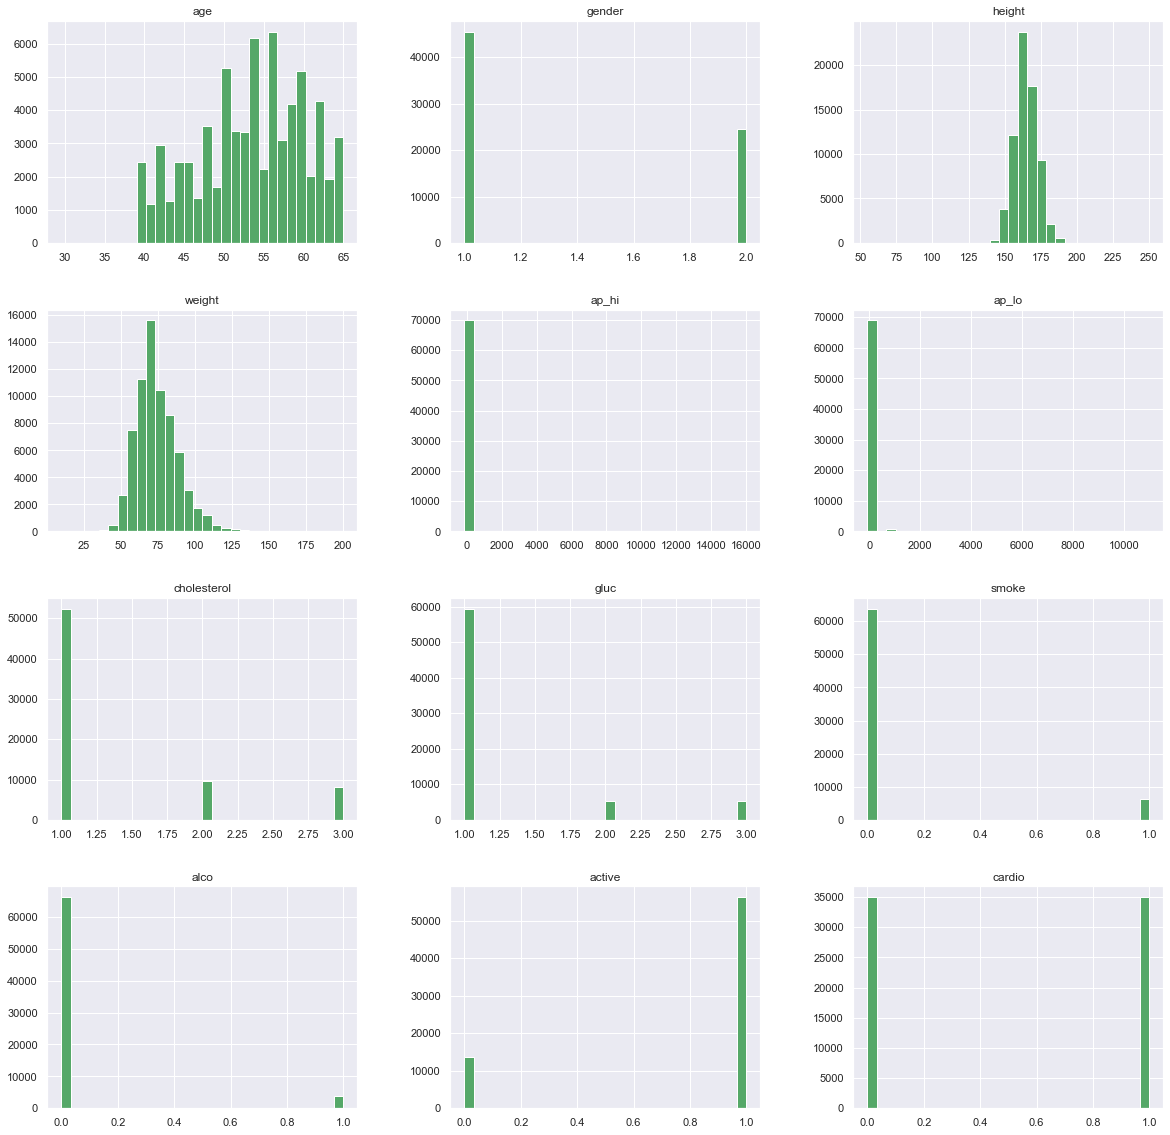

In [9]:
dataset.hist(bins = 30, figsize = (20,20), color = 'g')
plt.show()

## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [10]:
dataset.corr() # Pearson Correlation Coefficients

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [11]:
mask = np.zeros_like(dataset.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

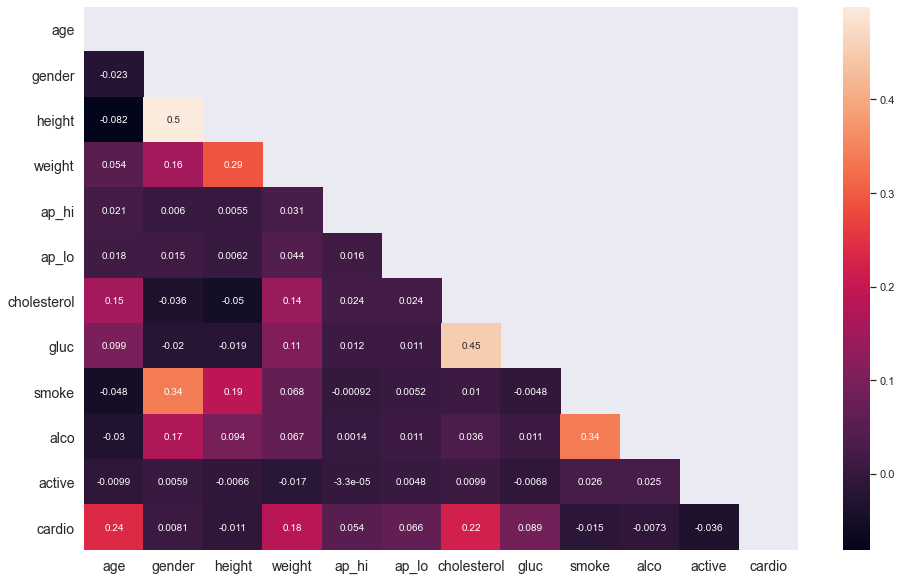

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(), annot=True, mask=mask, annot_kws={"size": 10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [83]:
#%%time
#sns.pairplot(dataset, hue = 'cardio')

## BUILD AND TRAIN AN ARTIFICIAL NEURAL NETWORK MODEL

In [14]:
# split the dataframe into target and features
y = dataset['cardio']
X = dataset.drop(columns = ['cardio'])

In [15]:
# Feature Scaling is a must in ANN
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
#spliting the data in to test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
# % of training set
len(X_train)/len(X)

0.8

In [18]:
# % of test data set
X_test.shape[0]/X.shape[0]

0.2

In [19]:
classifier = tf.keras.models.Sequential() #classifier
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(11, ))) #dense layer
classifier.add(tf.keras.layers.Dropout(0.2)) # dropout layer to prevent overfitting

classifier.add(tf.keras.layers.Dense(units=400, activation='relu')) # hidden layer
classifier.add(tf.keras.layers.Dense(units=400, activation='relu')) # hidden layer

classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # single output layer

In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               4800      
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 401       
Total params: 326,001
Trainable params: 326,001
Non-trainable params: 0
_________________________________________________________________


In [21]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [22]:
%%time
epochs_hist = classifier.fit(X_train, y_train, epochs = 100)

Epoch 1/100
1750/1750 [==============================] - 7s 4ms/step - loss: 0.5810 - accuracy: 0.7121
Epoch 2/100
1750/1750 [==============================] - 7s 4ms/step - loss: 0.5531 - accuracy: 0.7304
Epoch 3/100
1750/1750 [==============================] - 8s 4ms/step - loss: 0.5484 - accuracy: 0.7315
Epoch 4/100
1750/1750 [==============================] - 7s 4ms/step - loss: 0.5456 - accuracy: 0.7321
Epoch 5/100
1750/1750 [==============================] - 7s 4ms/step - loss: 0.5445 - accuracy: 0.7334
Epoch 6/100
1750/1750 [==============================] - 7s 4ms/step - loss: 0.5437 - accuracy: 0.7346
Epoch 7/100
1750/1750 [==============================] - 7s 4ms/step - loss: 0.5427 - accuracy: 0.7339: 
Epoch 8/100
1750/1750 [==============================] - 7s 4ms/step - loss: 0.5419 - accuracy: 0.7342
Epoch 9/100
1750/1750 [==============================] - 7s 4ms/step - loss: 0.5419 - accuracy: 0.7333
Epoch 10/100
1750/1750 [==============================] - 7s 4ms/step -

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
y_pred

array([[0.44408023],
       [0.24218234],
       [0.8882972 ],
       ...,
       [0.21541649],
       [0.22275203],
       [0.41583487]], dtype=float32)

In [39]:
y_pred = (y_pred > 0.5)

In [40]:
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

## EVALUATE THE ARTIFICIAL NEURAL NETWORK MODEL 

In [65]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

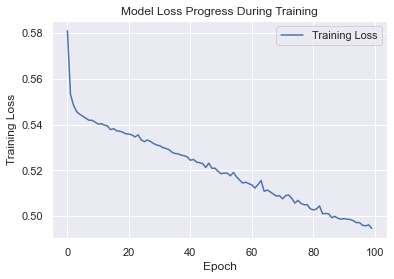

In [66]:
# training history model loss progress
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()

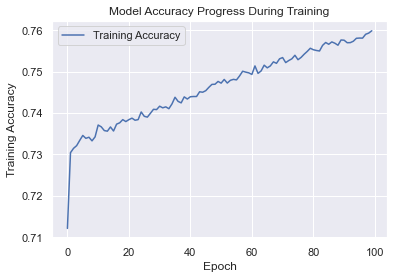

In [67]:
# training history model accuracy progress
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])
plt.show()

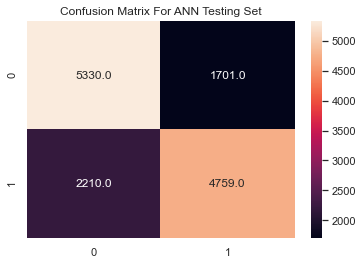

In [68]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".1f")
plt.title('Confusion Matrix For ANN Testing Set')
plt.show()

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      7031
           1       0.74      0.68      0.71      6969

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



## BUILD AND TRAIN AN XGBOOST CLASSIFIER MODEL

In [64]:
model = XGBClassifier()
model.fit(X_train, y_train)

[18:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [47]:
# make predictions on test data
predict = model.predict(X_test)

In [48]:
predict

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

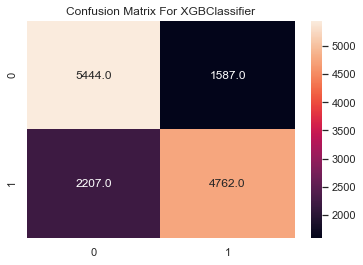

In [50]:
# plot the confusion matrix
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, fmt=".1f")
plt.title('Confusion Matrix For XGBClassifier')
plt.show()

In [49]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      7031
           1       0.75      0.68      0.72      6969

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

